In [9]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Initial data')

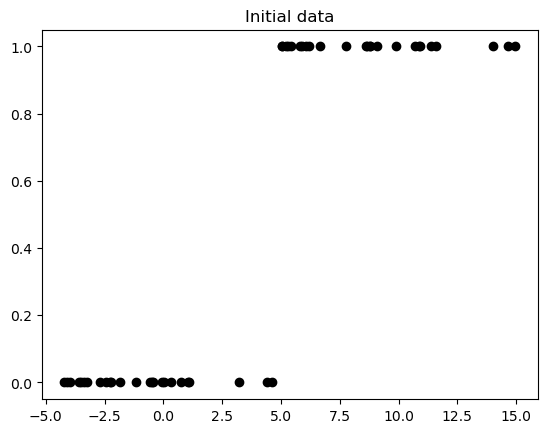

In [54]:
n = 50

x1 = np.random.rand(n // 2) * 10 - 5
x2 = np.random.rand(n // 2) * 10 + 5
X = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 0)
X = np.concatenate([X, np.full((n, 1), 1)], 1) 
y = np.concatenate([np.full((n // 2, 1), 0), np.full((n // 2, 1), 1)], 0)

plt.scatter(X[:, 0], y, c='black')
plt.title("Initial data")

In [ ]:
def sigmoid(W, X):
    return 1 / (1 + np.exp(-1 * (X.dot(W))))

def logistic_grad(W, X, y):
    return (X.T).dot(sigmoid(W, X) - y) / X.shape[0]

def logistic_loss(W, X, y):
    a = sigmoid(W, X)
    return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

In [38]:
def logistic_fit(X, y, learning_rate=0.01, epochs=100, tolerance=1e-5, batch_size=10):
    W = np.random.rand(2, 1)
    pre_W = W.copy()
    N = X.shape[0]
    batch_num = int(np.ceil(batch_size / N))
    losses = [sigmoid_loss(W, X, y)]
    for it in range(epochs):
        ID_list = np.random.permutation(N)
        for num in range(batch_num):
            batch_id = ID_list[batch_size * num:min(batch_size * (num + 1), N)]
            X_batch = X[batch_id, :]
            y_batch = y[batch_id]
            W -= learning_rate * logistic_grad(W, X, y) 
            losses.append(logistic_loss(W, X, y));
        if np.linalg.norm(W - pre_W) < tolerance:
            break
        pre_W = W.copy()
    return W, losses 


In [39]:
res_W, loss_hist = logistic_fit(X, y, 0.1, 1000)

Text(0.5, 1.0, 'Loss values')

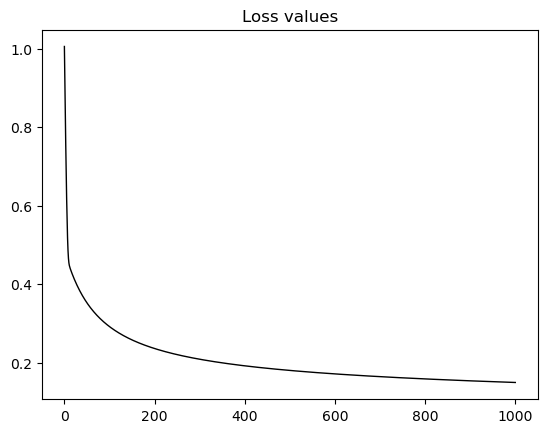

In [55]:
plt.plot(loss_hist, linewidth=1, c='black')
plt.title("Loss values")

In [40]:
print(res_W)

[[ 0.92010326]
 [-4.6279094 ]]


Text(0.5, 1.0, 'Result in logistic regression')

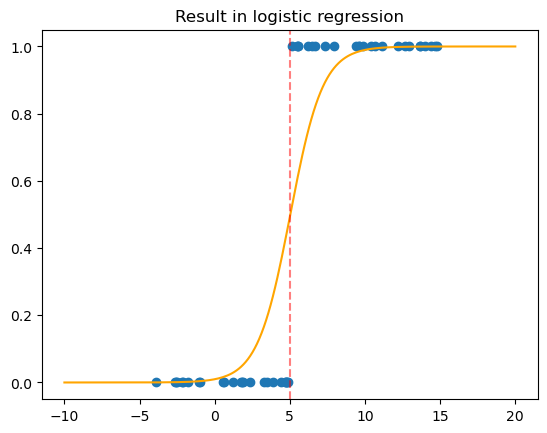

In [50]:
plt.scatter(X[:, 0], y)
x_display = np.linspace(-10, 20, 200).reshape(-1, 1)
x_display = np.concatenate([x_display, np.ones((200, 1))], 1)
y_display = sigmoid(res_W, x_display)
plt.plot(x_display[:, 0], y_display, c='orange')
plt.axvline(x = 5, color = 'r', linestyle = '--', alpha=0.5)
plt.title("Result in logistic regression")